#### IMPORTING THE LIBRARYS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#### LOADING THE DATA

In [9]:
df_iris=pd.read_csv("bc.csv") 
df_iris=df_iris.sample(frac=1)

df_iris

,--Control,1949_at,31397_at,31418_at,31420_at,31423_at,31430_at,31456_at,31588_at,31655_at,...,ZSCAN9,ZSWIM8,ZSWIM8-AS1,ZW10,ZWINT,ZXDB,ZYX,ZZEF1,ZZZ3,disease state
22,481.638,5.898,18.388,106.423,5.898,202.605,14.774,5.898,47.443,605.373,...,73.14,641.094,73.298,20.377,103.556,10.514,143.212,36.266,531.861,docetaxel sensitive tumor
25,476.48,6.763,30.882,223.352,11.602,405.067,10.828,20.038,59.023,458.538,...,11.804,1162.64,117.177,12.881,141.65,5.898,122.98,52.047,449.536,docetaxel sensitive tumor
11,547.932,6.349,24.588,155.837,19.86,137.418,14.748,5.898,64.293,429.854,...,18.749,1000.35,124.477,9.853,90.077,12.346,419.7,57.323,409.801,docetaxel resistant tumor
10,403.512,7.973,39.368,137.465,13.874,167.567,11.032,12.16,42.126,735.625,...,28.656,742.457,110.129,12.606,345.983,12.63,122.471,40.817,483.489,docetaxel resistant tumor
13,754.697,27.434,11.248,112.399,39.145,448.683,19.849,8.231,77.01,374.496,...,11.151,1605.16,130.286,5.898,147.782,18.823,124.623,33.997,346.116,docetaxel resistant tumor
21,555.931,6.686,16.583,100.592,24.067,196.904,10.38,9.383,94.356,230.441,...,19.79,1575.85,111.285,6.54,423.747,7.351,189.43,38.037,642.108,docetaxel sensitive tumor
23,853.811,5.898,17.12,190.768,6.488,202.763,5.898,5.898,80.688,342.491,...,20.944,1094.35,112.144,7.885,281.764,19.617,130.612,14.881,463.862,docetaxel sensitive tumor
2,850.384,12.003,38.887,138.804,24.6,313.709,25.422,5.898,95.546,48.03,...,61.238,893.673,159.588,5.898,225.341,21.405,223.523,67.028,177.656,docetaxel resistant tumor
8,856.824,11.647,26.802,132.972,32.803,318.081,5.898,21.691,77.137,309.116,...,34.655,934.118,129.955,7.971,782.144,14.506,46.953,38.178,334.116,docetaxel resistant tumor
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class


#### VISUALIZING DATA

In [12]:
sns.pairplot(data=df_iris,hue="target",kind="scatter") 
plt.show()

ValueError: No variables found for grid columns.

#### PREPARING DATA

here we separate the desired value into one array called target and all the features in another array

In [ ]:
target=df_iris["target"].array
df_features=df_iris.drop(columns=["target"]) 

X=df_features.values 

y=target 

#### TRAINING MODEL(old way)

In [ ]:
def getModel():
    #return LogisticRegression()
    return RandomForestClassifier()
    #return KNeighborsClassifier() 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = getModel().fit(X_train,y_train)

score = model.score(X_test, y_test) 

print('accuracy =', score)  

accuracy = 0.9


#### TRAINING MODEL(USING CROSS VALIDATION)

In [ ]:
scores = cross_val_score(getModel(),X,y,cv=10)

print('accuracy cv = ',np.mean(scores)) 
scores

accuracy cv =  0.9533333333333334


array([0.93333333, 0.93333333, 1.        , 0.86666667, 1.        ,
       1.        , 0.93333333, 1.        , 0.86666667, 1.        ])

#### VISUALIZING CONFUSION MATRIX

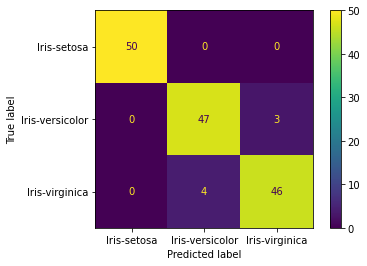

In [ ]:
y_pred = cross_val_predict(getModel(),X,y,cv=10)

cm = confusion_matrix(y,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)

disp.plot()

plt.show()